In [521]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline
#inline backend pour voir les figures dans le frontend notebook https://ipython.readthedocs.io/en/stable/interactive/plotting.html

#plt.style.reload_library()
#plt.style.use('mystyle')
#définition de routines matplotlib
def create_hpars1D_subplot(data,plotted_value,xcolname,ax=None):
    if ax is None:
        ax=plt.gca()
    pl=ax.plot(data[xcolname],data[plotted_value],label=plotted_value)
    #xlims et ylims ?
    return pl

def create_hpars2D_subplot(data,plotted_value,xcolname,ycolname,ax=None):
    if ax is None:
        ax=plt.gca()
    #mise en forme et contourplot
    ndisc=int(np.sqrt(data[plotted_value].size))
    Z=data[plotted_value].values.reshape((ndisc,ndisc),order='F')
    T1=data[xcolname].values.reshape((ndisc,ndisc),order='F')[0,:]
    T2=data[ycolname].values.reshape((ndisc,ndisc),order='F')[:,0]
    T1,T2=np.meshgrid(T1,T2)
    plo=ax.contourf(T1,T2,Z,cmap='Oranges')
    return plo


def create_marg1D_subplot(data,plotted_value,xcolname,ax=None):
    if ax is None:
        ax=plt.gca()
    pl=ax.plot(data[xcolname],data[plotted_value],label=plotted_value)
    #xlims et ylims ?
    ax.get_yaxis().set_visible(False)
    ax.grid()
    return pl

def create_marg2D_subplot(data,plotted_value,xcolname,ycolname,ax=None):
    if ax is None:
        ax=plt.gca()
    #mise en forme et contourplot
    ndisc=int(np.sqrt(data[plotted_value].size))
    Z=data[plotted_value].values.reshape((ndisc,ndisc),order='F')
    T1=data[xcolname].values.reshape((ndisc,ndisc),order='F')[0,:]
    T2=data[ycolname].values.reshape((ndisc,ndisc),order='F')[:,0]
    T1,T2=np.meshgrid(T1,T2)
    plo=ax.contourf(T1,T2,Z,cmap='Oranges')
    return plo

def plot_hopt(hpar):
    fig, ((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9)) = plt.subplots(3,3, figsize=(6,6))
    create_hpars1D_subplot(hopt1,hpar,'t1',ax1)
    ax1.set_xlabel('yo')
    create_hpars1D_subplot(hopt2,hpar,'t2',ax5)
    create_hpars1D_subplot(hopt3,hpar,'t3',ax9)
    create_hpars2D_subplot(hopt21,hpar,'t2','t1',ax2)
    create_hpars2D_subplot(hopt31,hpar,'t3','t1',ax3)
    create_hpars2D_subplot(hopt32,hpar,'t3','t2',ax6)
    ax4.axis('off')
    ax7.axis('off')
    ax8.axis('off')
    fig.suptitle("Hyperparamètre optimal : "+hpar)
    plt.tight_layout()
    
def plot_post_opt():
    fig, ((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9)) = plt.subplots(3,3, figsize=(6,6))
    create_marg1D_subplot(margopt1,'p','t1',ax1)
    ax1.set_xlabel('yo')
    create_marg1D_subplot(margopt2,'p','t2',ax5)
    create_marg1D_subplot(margopt3,'p','t3',ax9)
    create_marg2D_subplot(margopt21,'p','t2','t1',ax2)
    create_marg2D_subplot(margopt31,'p','t3','t1',ax3)
    create_marg2D_subplot(margopt32,'p','t3','t2',ax6)
    ax4.axis('off')
    ax7.axis('off')
    ax8.axis('off')
    fig.suptitle("Postérieure Opti")
    plt.tight_layout()

def plot_post_koh():
    fig, ((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9)) = plt.subplots(3,3, figsize=(6,6))
    create_marg1D_subplot(margkoh1,'p','t1',ax1)
    ax1.set_xlabel('yo')
    create_marg1D_subplot(margkoh2,'p','t2',ax5)
    create_marg1D_subplot(margkoh3,'p','t3',ax9)
    create_marg2D_subplot(margkoh21,'p','t2','t1',ax2)
    create_marg2D_subplot(margkoh31,'p','t3','t1',ax3)
    create_marg2D_subplot(margkoh32,'p','t3','t2',ax6)
    ax4.axis('off')
    ax7.axis('off')
    ax8.axis('off')
    fig.suptitle("Postérieure KOH")
    plt.tight_layout()
    
def plot_post_simp():
    fig, ((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9)) = plt.subplots(3,3, figsize=(6,6))
    create_marg1D_subplot(margsimp1,'p','t1',ax1)
    ax1.set_xlabel('yo')
    create_marg1D_subplot(margsimp2,'p','t2',ax5)
    create_marg1D_subplot(margsimp3,'p','t3',ax9)
    create_marg2D_subplot(margsimp21,'p','t2','t1',ax2)
    create_marg2D_subplot(margsimp31,'p','t3','t1',ax3)
    create_marg2D_subplot(margsimp32,'p','t3','t2',ax6)
    ax4.axis('off')
    ax7.axis('off')
    ax8.axis('off')
    fig.suptitle("Postérieure Sans EDM")
    plt.tight_layout()
    
def mcmc_allplot(x):
    X=np.arange(10000)
    plt.figure(figsize=(10,6))
    plt.plot(X,all_samples[x][X])
    plt.show()
    
def plot_samples_opt(ax=None):
    #affichage d'échantillons de opt
    if ax is None:
        ax=plt.gca()
    ax.plot('xorig','yprediction',data=predopt1)
    ax.plot('xorig','yprediction',data=predopt2)
    ax.plot('xorig','yprediction',data=predopt3)
    ax.scatter(obso[:,0],obso[:,1],color='tab:red',label='observations')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('Prédictions méthode Opti')
    ax.legend()
    ax.grid()
    
def plot_samples_koh(ax=None):
    #affichage d'échantillons de koh
    if ax is None:
        ax=plt.gca()
    ax.plot('xorig','yprediction',data=predkoh1)
    ax.plot('xorig','yprediction',data=predkoh2)
    ax.plot('xorig','yprediction',data=predkoh3)
    ax.scatter(obso[:,0],obso[:,1],color='tab:red',label='observations')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('Prédictions méthode KOH')
    ax.legend()
    ax.grid()
    
def plot_meanpred(dataf,ax=None):
    #affichage de prédictions moyennes
    if ax is None:
        ax=plt.gca()
    ax.scatter(obso[:,0],obso[:,1],color='tab:red',label='observations')
    ax.plot(dataf['x'],dataf['ymean'],color='black',label='prédiction moyenne')
    ax.fill_between(dataf['x'],dataf['ymean']-dataf['stdf'],dataf['ymean']+dataf['stdf'],alpha=0.2,color='green',label='variabilité du modèle corrigé')
    ax.plot(dataf['x'],dataf['ymean']-dataf['stdf'],color='black',alpha=0.2)
    ax.plot(dataf['x'],dataf['ymean']+dataf['stdf'],color='black',alpha=0.2)
    ax.fill_between(dataf['x'],dataf['ymean']-dataf['stdf'],dataf['ymean']-dataf['stdf']-dataf['stdedm'],alpha=0.2,color='blue',label='incertitude sur le biais de modèle')
    ax.fill_between(dataf['x'],dataf['ymean']+dataf['stdf'],dataf['ymean']+dataf['stdf']+dataf['stdedm'],alpha=0.2,color='blue')
    ax.plot(dataf['x'],dataf['ymean']+dataf['stdf']+dataf['stdedm'],color='black',alpha=0.2)
    ax.plot(dataf['x'],dataf['ymean']-dataf['stdf']-dataf['stdedm'],color='black',alpha=0.2)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.legend()
    ax.grid()
    
def plot_meanpredFZ(dataf,ax=None):
    #affichage de prédictions moyennes
    if ax is None:
        ax=plt.gca()
    ax.scatter(obso[:,0],obso[:,1],color='tab:red',label='observations')
    ax.plot(dataf['x'],dataf['ymean'],color='black',label='f moyen')
    ax.fill_between(dataf['x'],dataf['ymean']-dataf['stdf'],dataf['ymean']+dataf['stdf'],alpha=0.2,color='green',label='varf')
    ax.plot(dataf['x'],dataf['ymean']-dataf['stdf'],color='black',alpha=0.2)
    ax.plot(dataf['x'],dataf['ymean']+dataf['stdf'],color='black',alpha=0.2)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.legend()
    ax.grid()

def plot_meanpreds():
    fig,((ax1,ax2,ax3),(ax4,ax5,ax6))=plt.subplots(2,3,figsize=(18,12),sharey=True)
    plot_meanpred(predopt,ax1)
    ax1.set_title('Prédictions Opti')
    plot_meanpred(predkoh,ax2)
    ax2.set_title('Prédictions KOH')
    plot_meanpred(predmcmc,ax3)
    ax3.set_title('Prédictions Full Bayes')
    plot_meanpred(predsimp,ax4)
    ax4.set_title('Prédictions Sans EDM')
    plot_meanpred(predcv,ax5)
    ax5.set_title('Prédictions CV')
    plt.tight_layout()
    
def plot_meanpredsFZ():
    fig,((ax1,ax2,ax3),(ax4,ax5,ax6))=plt.subplots(2,3,figsize=(18,12),sharey=True)
    plot_meanpredFZ(predoptFZ,ax1)
    ax1.set_title('Prédictions Opti')
    plot_meanpredFZ(predkohFZ,ax2)
    ax2.set_title('Prédictions KOH')
    plot_meanpredFZ(predmcmcFZ,ax3)
    ax3.set_title('Prédictions MCMC')
    plt.tight_layout()
    



In [522]:
obs4=np.array([[1.5, 90810.0], [17.8, 162480.0], [19.7, 201070.0], [21.1, 380450.0], [22.5, 539450.0], [23.35, 793940.0], [23.8, 1203000.0], [24.1, 1037070.0]])
#observations du cas 4
obs20=np.array([[6.7096, 114750.0], [12.7682, 215160.0], [14.6209, 307380.0], [17.525, 422130.0], [18.6266, 549180.0], [19.4278, 706970.0], [20.5293, 854510.0], [22.432, 1086070.0]]
)
obs16=np.array([[1.409, 99140.0], [7.2705, 114170.0], [13.8647, 189160.0], [17.1337, 306430.0], [18.43, 442590.0], [19.1063, 565000.0], [19.6699, 627320.0], [20.1771, 738200.0], [20.7407, 879130.0], [20.9098, 1084870.0]]
)
obs14=np.array([[19.45, 546440.0], [19.65, 767990.0], [20.2, 802430.0], [21.45, 1081360.0], [21.55, 1348390.0], [21.8, 1472670.0], [23.4, 1521330.0]]
)
obs15=np.array([[13.2558, 229990.0], [15.3488, 366900.0], [16.794, 517310.0], [18.4884, 780600.0], [20.9801, 1124460.0], [23.2226, 1422650.0]]
)
obs21=np.array([[11.4781, 534170.0], [16.032, 867130.0], [18.1129, 1272230.0], [19.8928, 1752940.0], [20.5577, 2086780.0]]
)
obs22=np.array([[11.0691, 1917100.0], [16.9966, 2356600.0], [18.3676, 2594100.0], [20.3993, 2975900.0], [24.156, 3595100.0], [26.0974, 4461800.0]]
)

obso=obs20

In [523]:
######load data

file_name='resultssave/'
shortprefixe=file_name

#######loading predictions
predopt=pd.DataFrame(data=np.loadtxt(shortprefixe+"predopt.gnu"),columns=['x','ymean','stdf','stdedm'])
predkoh=pd.DataFrame(data=np.loadtxt(shortprefixe+"predkoh.gnu"),columns=['x','ymean','stdf','stdedm'])
predoptFZ=pd.DataFrame(data=np.loadtxt(shortprefixe+"predoptFZ.gnu"),columns=['x','ymean','stdf','zmean'])
predkohFZ=pd.DataFrame(data=np.loadtxt(shortprefixe+"predkohFZ.gnu"),columns=['x','ymean','stdf','zmean'])
predmcmcFZ=pd.DataFrame(data=np.loadtxt(shortprefixe+"predmcmcFZ.gnu"),columns=['x','ymean','stdf','zmean'])
predsimp=pd.DataFrame(data=np.loadtxt(shortprefixe+"predsimp.gnu"),columns=['x','ymean','stdf','stdedm'])
predcv=pd.DataFrame(data=np.loadtxt(shortprefixe+"predcv.gnu"),columns=['x','ymean','stdf','stdedm'])
predmcmc=pd.DataFrame(data=np.loadtxt(shortprefixe+"predmcmc.gnu"),columns=['x','ymean','stdf','stdedm'])
predopt1=pd.DataFrame(data=np.loadtxt(shortprefixe+"predopt1.gnu"),columns=['xorig','yprediction'])
predopt2=pd.DataFrame(data=np.loadtxt(shortprefixe+"predopt2.gnu"),columns=['xorig','yprediction'])
predopt3=pd.DataFrame(data=np.loadtxt(shortprefixe+"predopt3.gnu"),columns=['xorig','yprediction'])
predkoh1=pd.DataFrame(data=np.loadtxt(shortprefixe+"predkoh1.gnu"),columns=['xorig','yprediction'])
predkoh2=pd.DataFrame(data=np.loadtxt(shortprefixe+"predkoh2.gnu"),columns=['xorig','yprediction'])
predkoh3=pd.DataFrame(data=np.loadtxt(shortprefixe+"predkoh3.gnu"),columns=['xorig','yprediction'])
predsimp1=pd.DataFrame(data=np.loadtxt(shortprefixe+"predsimp1.gnu"),columns=['xorig','yprediction'])
predsimp2=pd.DataFrame(data=np.loadtxt(shortprefixe+"predsimp2.gnu"),columns=['xorig','yprediction'])
predsimp3=pd.DataFrame(data=np.loadtxt(shortprefixe+"predsimp3.gnu"),columns=['xorig','yprediction'])

######loading hpars opti
hopt1=pd.DataFrame(data=np.loadtxt(shortprefixe+"hoptmarg1.gnu"),columns=['t1','edm','exp','lcor'])
hopt2=pd.DataFrame(data=np.loadtxt(shortprefixe+"hoptmarg2.gnu"),columns=['t2','edm','exp','lcor'])
hopt3=pd.DataFrame(data=np.loadtxt(shortprefixe+"hoptmarg3.gnu"),columns=['t3','edm','exp','lcor'])
hopt21=pd.DataFrame(data=np.loadtxt(shortprefixe+"hoptmarg21.gnu"),columns=['t2','t1','edm','exp','lcor'])
hopt32=pd.DataFrame(data=np.loadtxt(shortprefixe+"hoptmarg32.gnu"),columns=['t3','t2','edm','exp','lcor'])
hopt31=pd.DataFrame(data=np.loadtxt(shortprefixe+"hoptmarg31.gnu"),columns=['t3','t1','edm','exp','lcor'])

######loading marginales opti
margopt1=pd.DataFrame(data=np.loadtxt(shortprefixe+"poptmarg1.gnu"),columns=['t1','p'])
margopt2=pd.DataFrame(data=np.loadtxt(shortprefixe+"poptmarg2.gnu"),columns=['t2','p'])
margopt3=pd.DataFrame(data=np.loadtxt(shortprefixe+"poptmarg3.gnu"),columns=['t3','p'])
margopt21=pd.DataFrame(data=np.loadtxt(shortprefixe+"poptmarg21.gnu"),columns=['t2','t1','p'])
margopt32=pd.DataFrame(data=np.loadtxt(shortprefixe+"poptmarg32.gnu"),columns=['t3','t2','p'])
margopt31=pd.DataFrame(data=np.loadtxt(shortprefixe+"poptmarg31.gnu"),columns=['t3','t1','p'])

######loading marginales koh
margkoh1=pd.DataFrame(data=np.loadtxt(shortprefixe+"pkohmarg1.gnu"),columns=['t1','p'])
margkoh2=pd.DataFrame(data=np.loadtxt(shortprefixe+"pkohmarg2.gnu"),columns=['t2','p'])
margkoh3=pd.DataFrame(data=np.loadtxt(shortprefixe+"pkohmarg3.gnu"),columns=['t3','p'])
margkoh21=pd.DataFrame(data=np.loadtxt(shortprefixe+"pkohmarg21.gnu"),columns=['t2','t1','p'])
margkoh32=pd.DataFrame(data=np.loadtxt(shortprefixe+"pkohmarg32.gnu"),columns=['t3','t2','p'])
margkoh31=pd.DataFrame(data=np.loadtxt(shortprefixe+"pkohmarg31.gnu"),columns=['t3','t1','p'])

######loading marginales simp (no edm)
margsimp1=pd.DataFrame(data=np.loadtxt(shortprefixe+"psimpmarg1.gnu"),columns=['t1','p'])
margsimp2=pd.DataFrame(data=np.loadtxt(shortprefixe+"psimpmarg2.gnu"),columns=['t2','p'])
margsimp3=pd.DataFrame(data=np.loadtxt(shortprefixe+"psimpmarg3.gnu"),columns=['t3','p'])
margsimp21=pd.DataFrame(data=np.loadtxt(shortprefixe+"psimpmarg21.gnu"),columns=['t2','t1','p'])
margsimp32=pd.DataFrame(data=np.loadtxt(shortprefixe+"psimpmarg32.gnu"),columns=['t3','t2','p'])
margsimp31=pd.DataFrame(data=np.loadtxt(shortprefixe+"psimpmarg31.gnu"),columns=['t3','t1','p'])

######loading mcmc samples
all_samples=pd.DataFrame(data=np.loadtxt(shortprefixe+"mcmc_allsamples.gnu"),columns=['t1','t2','t3','edm','exp','lcor','p'])
selected_samples=pd.DataFrame(data=np.loadtxt(shortprefixe+"mcmc_selectedsamples.gnu"),columns=['t1','t2','t3','edm','exp','lcor','p'])


###### hpars opti
hopt=pd.DataFrame(data=np.loadtxt(shortprefixe+"hopt.gnu"),columns=['t1','t2','t3','edm','exp','lcor'])
popt=pd.DataFrame(data=np.loadtxt(shortprefixe+"popt.gnu"),columns=['t1','t2','t3','p'])


In [524]:
print(popt)

         t1        t2     t3           p
0     11.75  0.000010  0.315       0.000
1     11.75  0.000010  0.345       0.000
2     11.75  0.000010  0.375       0.000
3     11.75  0.000010  0.405       0.000
4     11.75  0.000010  0.435       0.000
5     11.75  0.000010  0.465       0.000
6     11.75  0.000010  0.495       0.000
7     11.75  0.000010  0.525       0.000
8     11.75  0.000010  0.555       0.000
9     11.75  0.000010  0.585       0.000
10    11.75  0.000010  0.615       0.000
11    11.75  0.000010  0.645       0.000
12    11.75  0.000010  0.675       0.000
13    11.75  0.000010  0.705       0.000
14    11.75  0.000010  0.735       0.000
15    11.75  0.000010  0.765       0.000
16    11.75  0.000010  0.795       0.000
17    11.75  0.000010  0.825       0.000
18    11.75  0.000010  0.855       0.000
19    11.75  0.000010  0.885       0.000
20    11.75  0.000011  0.315       0.000
21    11.75  0.000011  0.345       0.000
22    11.75  0.000011  0.375       0.000
23    11.75  0.0

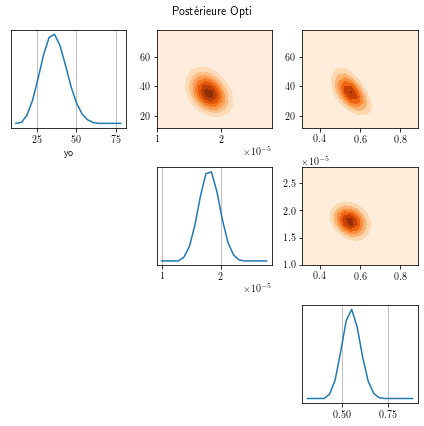

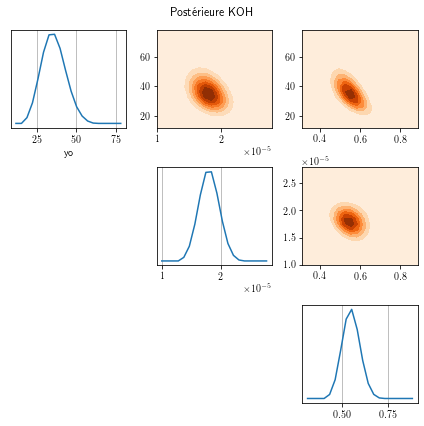

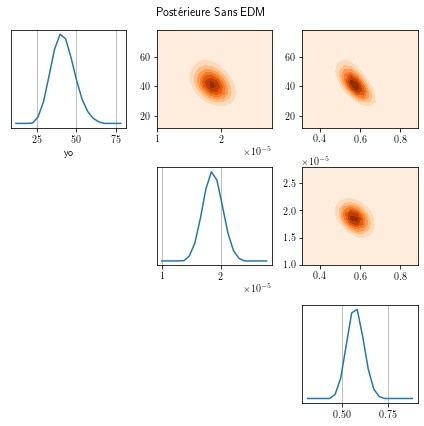

In [525]:
plot_post_opt()
plot_post_koh()
plot_post_simp()

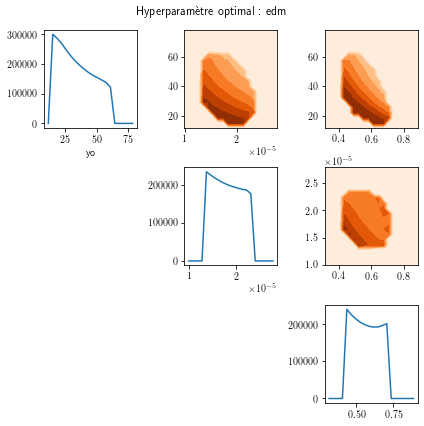

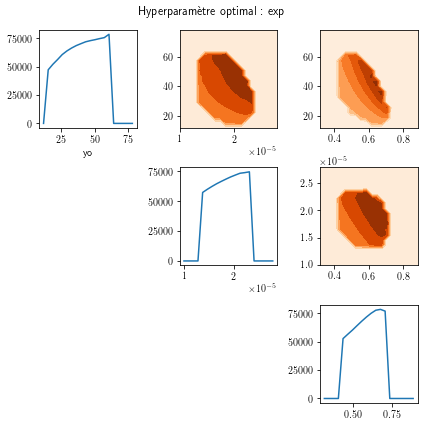

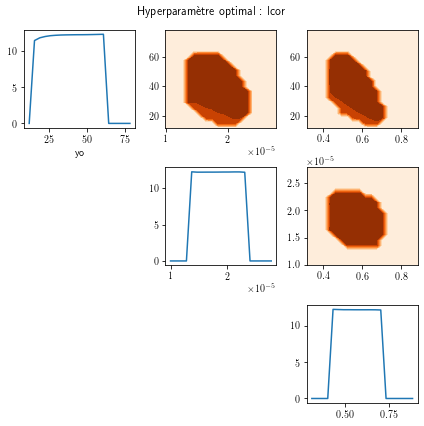

In [526]:
plot_hopt('edm')
plot_hopt('exp')
plot_hopt('lcor')
#plot_hopt('moy')

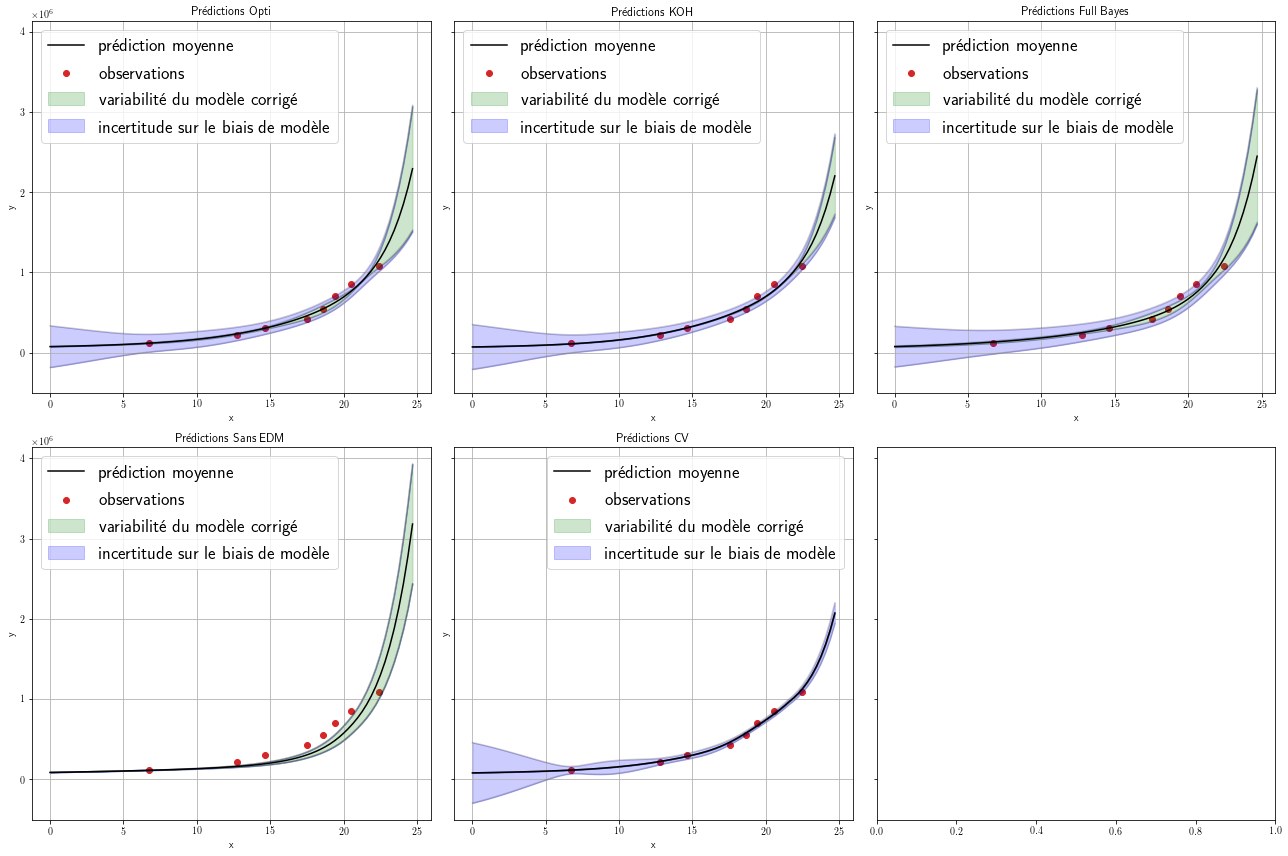

In [527]:
plot_meanpreds()

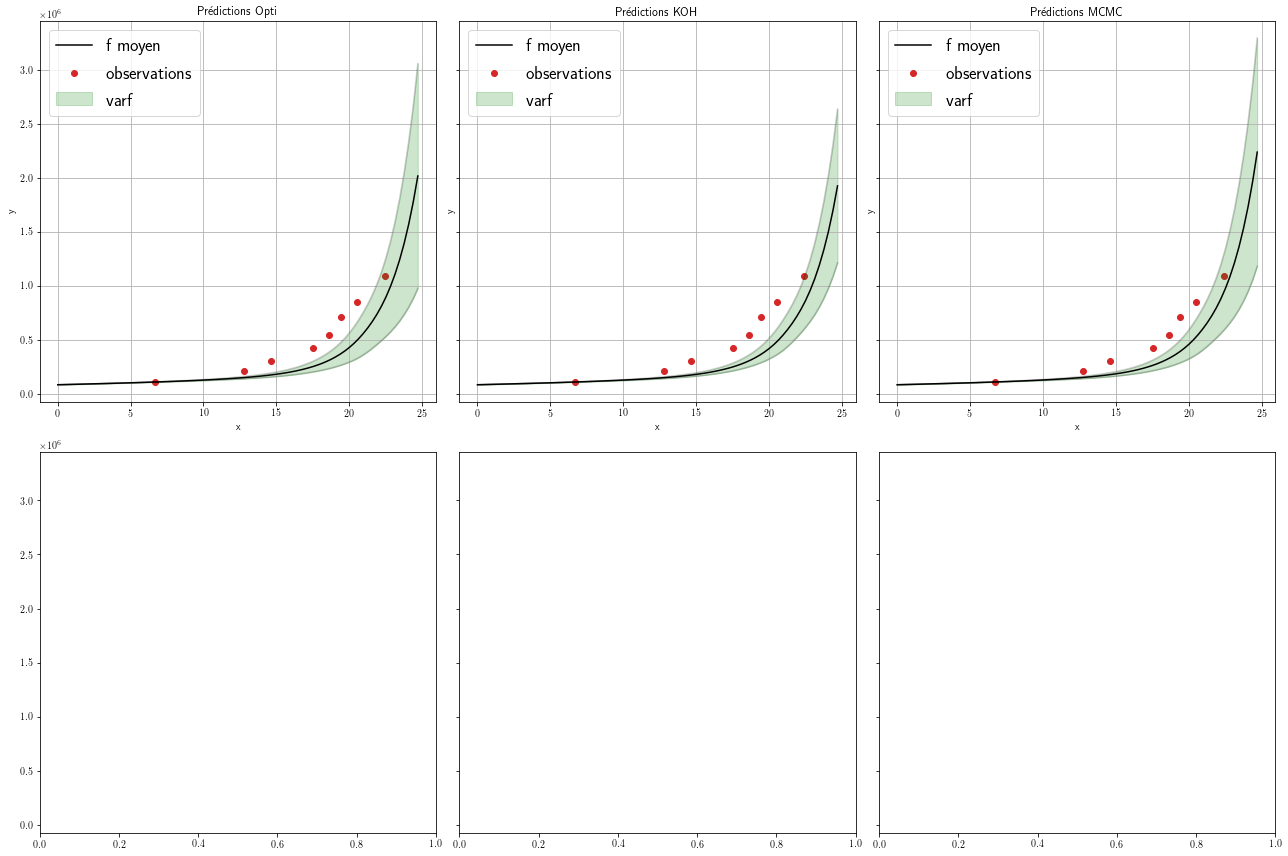

In [528]:
plot_meanpredsFZ()

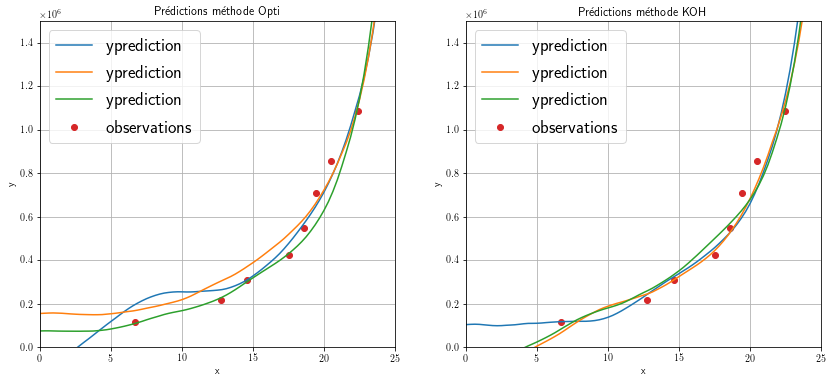

In [529]:
#affichage des densités sur un même graphe propre.

xmin=0
xmax=25
ymin=0
ymax=1.5E6




plt.figure(figsize=[14,6])
ax=plt.subplot(121)

plt.plot('xorig','yprediction',data=predopt1)
plt.plot('xorig','yprediction',data=predopt2)
plt.plot('xorig','yprediction',data=predopt3)
plt.scatter(obso[:,0],obso[:,1],color='tab:red',label='observations')
ax.set_xlim(xmin,xmax)
ax.set_ylim(ymin,ymax)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.title('Prédictions méthode Opti')
plt.legend()
plt.grid()
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

ax=plt.subplot(122)
plt.plot('xorig','yprediction',data=predkoh1)
plt.plot('xorig','yprediction',data=predkoh2)
plt.plot('xorig','yprediction',data=predkoh3)
plt.scatter(obso[:,0],obso[:,1],color='tab:red',label='observations')
ax.set_xlim(xmin,xmax)
ax.set_ylim(ymin,ymax)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.title('Prédictions méthode KOH')
plt.legend()
plt.grid()
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

In [530]:
#mcmc_allplot('b')

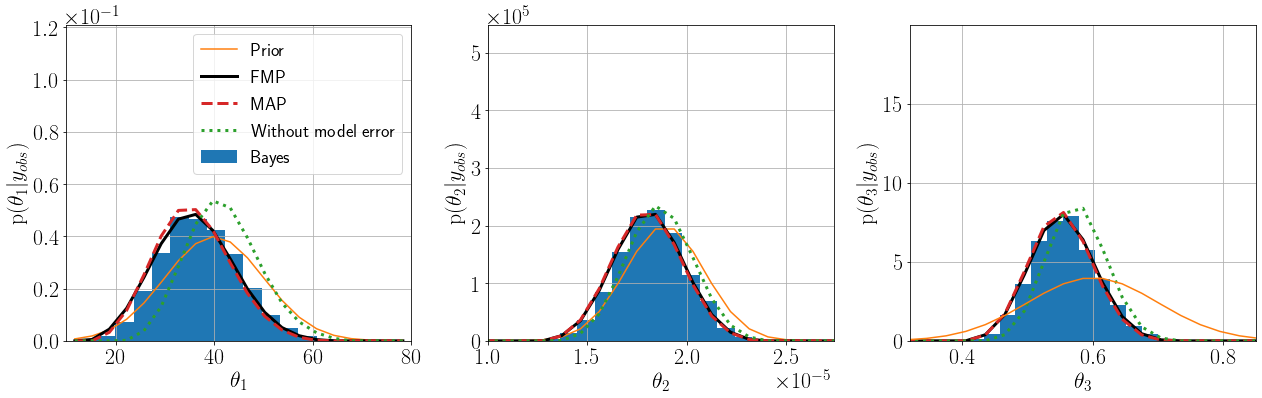

In [531]:
#plt.style.use('mystyle')
mpl.rcParams['text.usetex']=True
mpl.rcParams['font.sans-serif']='Arial'
mpl.rcParams['font.weight']='bold'
#mpl.rcParams['axes.labelsize']= 33.0 #def value : 11.0
#mpl.rcParams['axes.titlesize']= 28.0 #def value : 12.0
mpl.rcParams['savefig.format']='png'
mpl.rcParams['font.size']=22

mpl.rcParams['legend.fontsize']=18

nbins=15
#priors
t1pmean=40.
t1pstd=2*5
t2pmean=18.9E-6
t2pstd=2E-6
t3pmean=0.6
t3pstd=2*0.05


margopt1['p']/=margopt1['p'].sum()*(margopt1['t1'][1]-margopt1['t1'][0])
margkoh1['p']/=margkoh1['p'].sum()*(margkoh1['t1'][1]-margkoh1['t1'][0])
margsimp1['p']/=margsimp1['p'].sum()*(margsimp1['t1'][1]-margsimp1['t1'][0])
margopt2['p']/=margopt2['p'].sum()*(margopt2['t2'][1]-margopt2['t2'][0])
margkoh2['p']/=margkoh2['p'].sum()*(margkoh2['t2'][1]-margkoh2['t2'][0])
margsimp2['p']/=margsimp2['p'].sum()*(margsimp2['t2'][1]-margsimp2['t2'][0])
margopt3['p']/=margopt3['p'].sum()*(margopt3['t3'][1]-margopt3['t3'][0])
margkoh3['p']/=margkoh3['p'].sum()*(margkoh3['t3'][1]-margkoh3['t3'][0])
margsimp3['p']/=margsimp3['p'].sum()*(margsimp3['t3'][1]-margsimp3['t3'][0])
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(18,6))

ax1.hist(selected_samples['t1'],bins=nbins,density=True,label='Bayes')#,zorder=0)
ax1.plot(margopt1['t1'],norm.pdf(margopt1['t1'],loc=t1pmean,scale=t1pstd),label='Prior')
ax1.plot(margopt1['t1'],margopt1['p'],label='FMP',color='black',marker=None,linewidth=3)
ax1.plot(margkoh1['t1'],margkoh1['p'],'--',label='MAP',color='tab:red',marker=None,linewidth=3)
ax1.plot(margsimp1['t1'],margsimp1['p'],':',label='Without model error',color='tab:green',marker=None,linewidth=3)

#plt.title('Parameter posterior density')
ax1.set_xlabel(r'$\theta_1$')
ax1.set_ylabel(r'$\mathrm{p}(\theta_1|y_{obs})$')
ax1.set_xlim(10,80)
ax1.set_ylim(0,2.5*margopt1['p'].max())
ax1.ticklabel_format(axis='y',style='sci',scilimits=(0,0))
ax1.grid()
ax1.legend()

ax2.plot(margopt2['t2'],norm.pdf(margopt2['t2'],loc=t2pmean,scale=t2pstd),label='Prior',color='tab:orange')
ax2.hist(selected_samples['t2'],bins=nbins,density=True,label='Bayes')#,zorder=0)
ax2.plot(margopt2['t2'],margopt2['p'],label='FMP',color='black',marker=None,linewidth=3)
ax2.plot(margkoh2['t2'],margkoh2['p'],'--',label='MAP',color='tab:red',marker=None,linewidth=3)
ax2.plot(margsimp2['t2'],margsimp2['p'],':',label='Without model error',color='tab:green',marker=None,linewidth=3)

#plt.title('Parameter posterior density')
ax2.set_xlabel(r'$\theta_2$')
ax2.set_ylabel(r'$\mathrm{p}(\theta_2|y_{obs})$')
ax2.set_xlim(1e-5,1.45*18.9E-6)
ax2.set_ylim(0,2.5*margopt2['p'].max())
ax2.ticklabel_format(axis='y',style='sci',scilimits=(0,0))
ax2.grid()
#ax2.legend()

ax3.hist(selected_samples['t3'],bins=nbins,density=True,label='Bayes')#,zorder=0)
ax3.plot(margopt3['t3'],margopt3['p'],label='FMP',color='black',marker=None,linewidth=3)
ax3.plot(margkoh3['t3'],margkoh3['p'],'--',label='MAP',color='tab:red',marker=None,linewidth=3)
ax3.plot(margsimp3['t3'],margsimp3['p'],':',label='Without model error',color='tab:green',marker=None,linewidth=3)
ax3.plot(margopt3['t3'],norm.pdf(margopt3['t3'],loc=t3pmean,scale=t3pstd),label='Prior')
#plt.title('Parameter posterior density')
ax3.set_xlabel(r'$\theta_3$')
ax3.set_ylabel(r'$\mathrm{p}(\theta_3|y_{obs})$')
ax3.set_ylim(0,2.5*margopt3['p'].max())
ax3.set_xlim(0.32,0.85)
ax3.grid()
#ax3.legend()

plt.tight_layout()


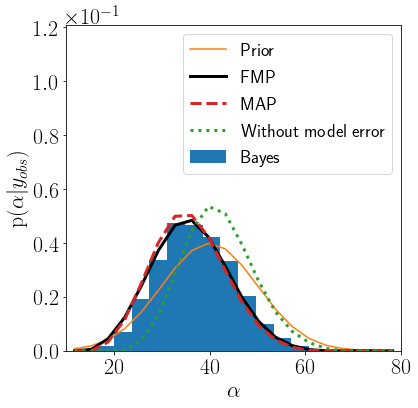

In [532]:
fig, ax1 = plt.subplots(1,1, figsize=(6,6))

ax1.hist(selected_samples['t1'],bins=nbins,density=True,label='Bayes')#,zorder=0)
ax1.plot(margopt1['t1'],norm.pdf(margopt1['t1'],loc=t1pmean,scale=t1pstd),label='Prior')
ax1.plot(margopt1['t1'],margopt1['p'],label='FMP',color='black',marker=None,linewidth=3)
ax1.plot(margkoh1['t1'],margkoh1['p'],'--',label='MAP',color='tab:red',marker=None,linewidth=3)
ax1.plot(margsimp1['t1'],margsimp1['p'],':',label='Without model error',color='tab:green',marker=None,linewidth=3)

#plt.title('Parameter posterior density')
ax1.set_xlabel(r'$\alpha$')
ax1.set_ylabel(r'$\mathrm{p}(\alpha|y_{obs})$')
ax1.set_xlim(10,80)
ax1.set_ylim(0,2.5*margopt1['p'].max())
ax1.ticklabel_format(axis='y',style='sci',scilimits=(0,0))

ax1.legend()
plt.show()

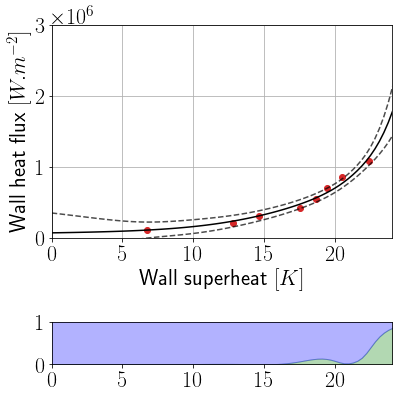

In [533]:
fig, ((ax1),(ax2)) = plt.subplots(2,1, figsize=(6,6),gridspec_kw={'height_ratios': [5, 1]})

ax1.scatter(obso[:,0],obso[:,1],color='tab:red',label='observations')
ax1.plot(predkoh['x'],predkoh['ymean'],color='black',label='prédiction moyenne')
ax1.plot(predkoh['x'],predkoh['ymean']+predkoh['stdf']+predkoh['stdedm'],'--',color='black',alpha=0.7)
ax1.plot(predkoh['x'],predkoh['ymean']-predkoh['stdf']-predkoh['stdedm'],'--',color='black',alpha=0.7)
ax1.set_xlim(0,24)
ax1.set_ylim(0,3000000)

ax2.fill_between(predkoh['x'],0,predkoh['stdf']/(predkoh['stdf']+predkoh['stdedm']),alpha=0.3,color='green')
ax2.fill_between(predkoh['x'],predkoh['stdf']/(predkoh['stdf']+predkoh['stdedm']),1,alpha=0.3,color='blue')
ax2.set_ylim(0,1)   
ax1.grid()
ax1.set_ylabel(r'Wall heat flux $[W.m^{-2}]$')
ax1.set_xlabel(r'Wall superheat $[K]$')
ax2.set_xlim(0,24)
plt.tight_layout()
    

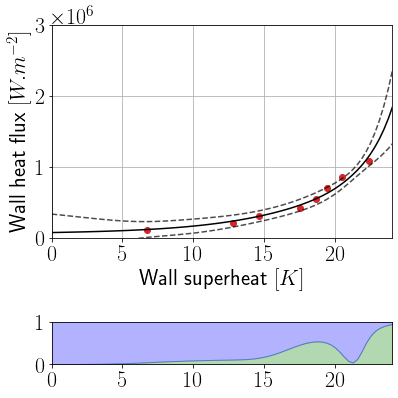

In [534]:
fig, ((ax1),(ax2)) = plt.subplots(2,1, figsize=(6,6),gridspec_kw={'height_ratios': [5, 1]})

ax1.scatter(obso[:,0],obso[:,1],color='tab:red',label='observations')
ax1.plot(predopt['x'],predopt['ymean'],color='black',label='prédiction moyenne')
ax1.plot(predopt['x'],predopt['ymean']+predopt['stdf']+predopt['stdedm'],'--',color='black',alpha=0.7)
ax1.plot(predopt['x'],predopt['ymean']-predopt['stdf']-predopt['stdedm'],'--',color='black',alpha=0.7)
ax1.set_xlim(0,24)
ax1.set_ylim(0,3000000)
ax2.fill_between(predopt['x'],0,predopt['stdf']/(predopt['stdf']+predopt['stdedm']),alpha=0.3,color='green')
ax2.fill_between(predopt['x'],predopt['stdf']/(predopt['stdf']+predopt['stdedm']),1,alpha=0.3,color='blue')
ax2.set_ylim(0,1)   
ax1.grid()
ax1.set_ylabel(r'Wall heat flux $[W.m^{-2}]$')
ax1.set_xlabel(r'Wall superheat $[K]$')
ax2.set_xlim(0,24)
    
plt.tight_layout()

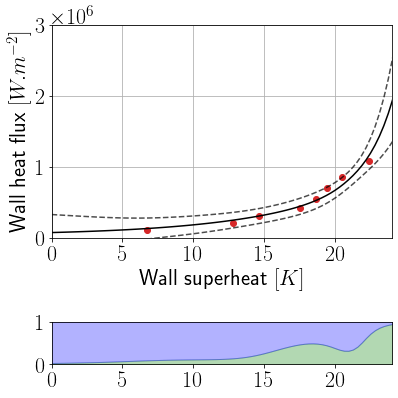

In [535]:
fig, ((ax1),(ax2)) = plt.subplots(2,1, figsize=(6,6),gridspec_kw={'height_ratios': [5, 1]})

ax1.scatter(obso[:,0],obso[:,1],color='tab:red',label='observations')
ax1.plot(predmcmc['x'],predmcmc['ymean'],color='black',label='prédiction moyenne')
ax1.plot(predmcmc['x'],predmcmc['ymean']+predmcmc['stdf']+predmcmc['stdedm'],'--',color='black',alpha=0.7)
ax1.plot(predmcmc['x'],predmcmc['ymean']-predmcmc['stdf']-predmcmc['stdedm'],'--',color='black',alpha=0.7)
ax1.set_xlim(0,24)
ax1.set_ylim(0,3000000)
ax2.fill_between(predmcmc['x'],0,predmcmc['stdf']/(predmcmc['stdf']+predmcmc['stdedm']),alpha=0.3,color='green')
ax2.fill_between(predmcmc['x'],predmcmc['stdf']/(predmcmc['stdf']+predmcmc['stdedm']),1,alpha=0.3,color='blue')
ax2.set_ylim(0,1)   
ax1.grid()
ax1.set_ylabel(r'Wall heat flux $[W.m^{-2}]$')
ax1.set_xlabel(r'Wall superheat $[K]$')
ax2.set_xlim(0,24)
    
plt.tight_layout()

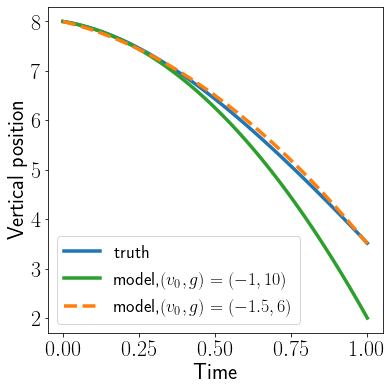

In [536]:
###Exemple Plumlee gravity ball
def model(t,v,g):
    return 8+v*t-0.5*g*t**2

def truth(t):
    return 8+2.5*np.log(50./49.-(50./49.)*np.tanh(np.arctanh(np.sqrt(0.02))+np.sqrt(2)*t)**2)

lw=3.5
X=np.linspace(0,1,100)
fig=plt.figure(figsize=(6,6))
plt.plot(X,truth(X),label=r"truth",linewidth=lw,color='tab:blue')
plt.plot(X,model(X,-1,10),label=r"model,$(v_0,g)=(-1,10)$",linewidth=lw,color='tab:green')
plt.plot(X,model(X,-1.5,6),'--',label="model,$(v_0,g)=(-1.5,6)$",linewidth=lw,color='tab:orange')
plt.legend(loc='lower left')
plt.xlabel('Time')
plt.ylabel('Vertical position')
plt.show()


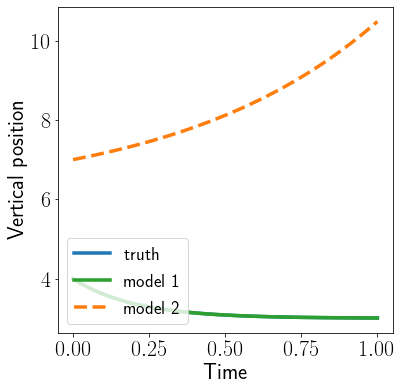

In [537]:
def model(x,theta,c):
    return np.exp(-theta*x)+c

def truth(x):
    return np.exp(-5*x)+3

X=np.linspace(0,1,100)
fig=plt.figure(figsize=(6,6))
plt.plot(X,truth(X),label=r"truth",linewidth=lw,color='tab:blue')
plt.plot(X,model(X,5,3),label=r"model 1",linewidth=lw,color='tab:green')
plt.plot(X,model(X,-1.5,6),'--',label="model 2",linewidth=lw,color='tab:orange')
plt.legend(loc='lower left')
plt.xlabel('Time')
plt.ylabel('Vertical position')
plt.show()

In [ ]:
######loading mcmc samples
all_samples=pd.DataFrame(data=np.loadtxt(shortprefixe+"mcmc_allsamples.gnu"),columns=['t1','t2','t3','edm','exp','lcor','p'])
selected_samples=pd.DataFrame(data=np.loadtxt(shortprefixe+"mcmc_selectedsamples.gnu"),columns=['t1','t2','t3','edm','exp','lcor','p'])

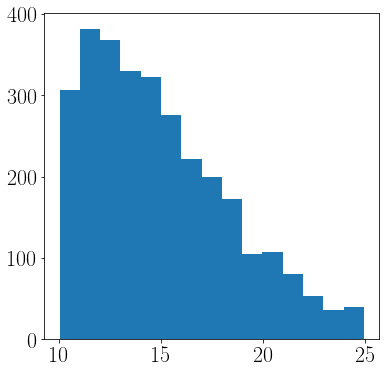

In [552]:
#histogramme des hyperparamètres (test)
plt.figure(figsize=(6,6))
plt.hist(selected_samples['lcor'],bins=nbins,label='t1')
plt.show()
#,zorder=0)

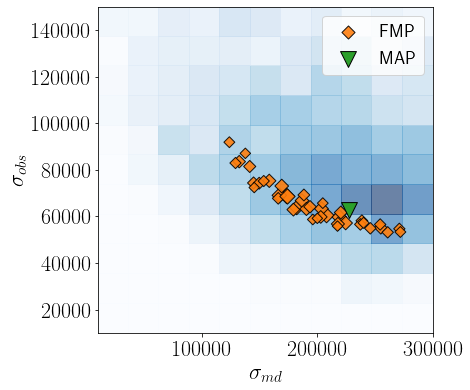

         t1        t2     t3       edm       exp      lcor
2988  36.25  0.000018  0.555  173393.1  68744.60  12.13729
2968  36.25  0.000017  0.555  207946.6  60431.27  12.18813
2588  32.75  0.000018  0.555  219069.4  59678.41  12.23219
3368  39.75  0.000017  0.555  167045.8  69016.92  12.12991
3387  39.75  0.000018  0.525  182105.1  63726.95  12.16751
2569  32.75  0.000017  0.585  203481.0  63298.36  12.17059
2589  32.75  0.000018  0.585  169156.7  73014.18  12.12548
2608  32.75  0.000019  0.555  186690.5  66755.97  12.15622
2987  36.25  0.000018  0.525  224521.8  57132.69  12.27149
2969  36.25  0.000017  0.585  158343.0  75253.64  12.12802
3007  36.25  0.000019  0.525  190526.6  63182.73  12.18838
3367  39.75  0.000017  0.525  217785.2  56725.50  12.27387
2189  29.25  0.000018  0.585  220321.6  61635.45  12.18427
3767  43.25  0.000017  0.525  179249.2  62880.75  12.16527
3348  39.75  0.000017  0.555  202953.2  59746.67  12.20358
2568  32.75  0.000017  0.555  254966.8  55093.24  12.350

In [539]:
#histogramme 2D des hyperparamètres (test)
from matplotlib.image import NonUniformImage
hparsestkoh=(227831,62736,10)
#hparsestkoh=(10000,109794,25)
nhead=40

xvector=selected_samples['edm']
yvector=selected_samples['exp']
H,xedges,yedges=np.histogram2d(xvector,yvector,bins=11,range=[[10000,300000],[10000,150000]])
H=H.T
X, Y = np.meshgrid(xedges, yedges)

###### hpars opti
hopt=pd.DataFrame(data=np.loadtxt(shortprefixe+"hopt.gnu"),columns=['t1','t2','t3','edm','exp','lcor'])
popt=pd.DataFrame(data=np.loadtxt(shortprefixe+"popt.gnu"),columns=['t1','t2','t3','p'])

popt=popt.sort_values(by=['p'],ascending=False)
#print(popt)
#print(hopt['lcor'].loc[popt.head(nhead).index])
#print(popt['p'].head(nhead))
hpars_points=hopt.loc[popt.head(nhead).index]


fig,ax=plt.subplots(1,1,figsize=(6,6))
ax.pcolormesh(X, Y, H,cmap='Blues',alpha=0.6,shading='flat')
ax.scatter(hpars_points['edm'],hpars_points['exp'],edgecolor='black',marker='D',alpha=0.9,color='tab:orange',s=0.0009*popt['p'].head(nhead),label='FMP')
ax.scatter(hpars_points['edm'].head(1),hpars_points['exp'].head(1),edgecolor='black',marker='D',alpha=0.9,color='tab:orange',s=0.0009*popt['p'].head(1))

ax.scatter(hparsestkoh[0],hparsestkoh[1],edgecolor='black',marker='v',color='tab:green',s=250,label=r'MAP')
plt.legend()
ax.set_xlabel(r'$\sigma_{md}$')
ax.set_ylabel(r'$\sigma_{obs}$')

plt.show()
#,zorder=0)
print(hpars_points.head(40))
print(all_samples.sort_values(by=['p'],ascending=False).head(1))
#print(selected_samples)

In [540]:
#estimation of model error
predoptFZ=pd.DataFrame(data=np.loadtxt(shortprefixe+"predoptFZ.gnu"),columns=['x','ymean','stdf','zmean'])
predkohFZ=pd.DataFrame(data=np.loadtxt(shortprefixe+"predkohFZ.gnu"),columns=['x','ymean','stdf','zmean'])
predmcmcFZ=pd.DataFrame(data=np.loadtxt(shortprefixe+"predmcmcFZ.gnu"),columns=['x','ymean','stdf','zmean'])
print(predkohFZ['zmean'].mean()*25)
print(predoptFZ['zmean'].mean()*25)
print(predmcmcFZ['zmean'].mean()*25)

2907271.3195625003
2850260.05371875
2551858.4882343747


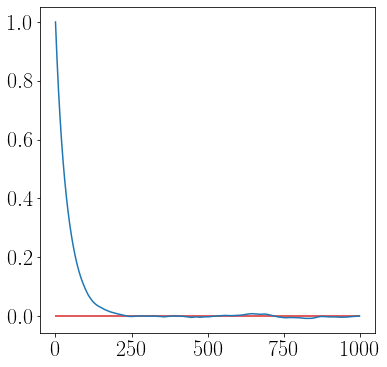

In [541]:
autocor=pd.DataFrame(data=np.loadtxt(shortprefixe+"autocor.gnu"),columns=['t1','t2','t3','edm','exp','lcor'])
fig,ax=plt.subplots(1,1,figsize=(6,6))
ax.plot(autocor['lcor'])
ax.hlines(0,0,1000,color='tab:red')
plt.show()

In [542]:
# le meilleur des samples ?
print(selected_samples.sort_values(by=['p'],ascending=False).head(20))

            t1        t2        t3       edm       exp      lcor         p
941   39.32900  0.000018  0.535612  174880.5  72200.43  12.81053 -95.77321
14    33.14688  0.000018  0.565906  218381.6  55334.49  11.72351 -95.78889
2838  33.39384  0.000018  0.572117  217463.4  63819.73  11.23996 -95.79233
1619  33.21149  0.000019  0.554010  225312.7  71847.88  12.21045 -95.84641
1743  33.33595  0.000018  0.556818  238367.0  57524.36  11.52301 -95.86531
932   34.52075  0.000019  0.566562  157097.4  64831.29  10.41571 -95.89209
1173  32.04752  0.000019  0.575846  169377.0  76220.36  11.59432 -95.89753
46    37.82058  0.000017  0.545610  239846.1  62883.57  12.76911 -95.90195
2758  37.89039  0.000018  0.537107  253603.9  55315.66  13.29992 -95.90461
41    31.41361  0.000019  0.585888  200750.8  71637.07  12.74276 -95.91399
2072  40.80500  0.000018  0.533795  225926.9  59698.28  12.05170 -95.92020
194   34.66299  0.000017  0.578448  195609.8  61858.72  14.26587 -95.94963
896   35.24664  0.000018 

In [543]:
print(all_samples.query('edm<206912').query('edm>204000').query('exp<62000').query('exp>61000').sort_values(by=['p'],ascending=False).head(20))

               t1        t2        t3       edm       exp      lcor         p
1644505  35.34440  0.000018  0.565589  204086.4  61808.27  12.88134 -95.68980
1644503  35.34440  0.000018  0.565589  204086.4  61808.27  12.88134 -95.68980
1644506  35.34440  0.000018  0.565589  204086.4  61808.27  12.88134 -95.68980
1644504  35.34440  0.000018  0.565589  204086.4  61808.27  12.88134 -95.68980
1010276  32.20762  0.000018  0.575023  205578.0  61002.60  12.73479 -95.87543
1010280  32.20762  0.000018  0.575023  205578.0  61002.60  12.73479 -95.87543
1010271  32.20762  0.000018  0.575023  205578.0  61002.60  12.73479 -95.87543
1010272  32.20762  0.000018  0.575023  205578.0  61002.60  12.73479 -95.87543
1010273  32.20762  0.000018  0.575023  205578.0  61002.60  12.73479 -95.87543
1010274  32.20762  0.000018  0.575023  205578.0  61002.60  12.73479 -95.87543
1010275  32.20762  0.000018  0.575023  205578.0  61002.60  12.73479 -95.87543
1010290  32.20762  0.000018  0.575023  205578.0  61002.60  12.73

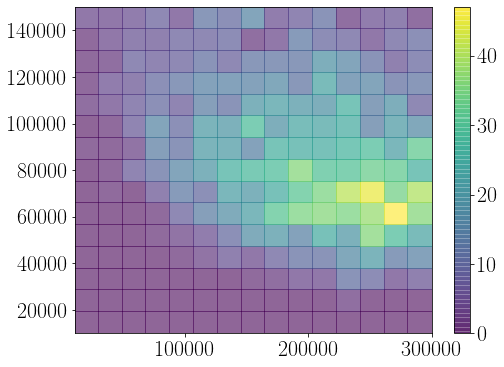

In [544]:
plt.figure(figsize=(8,6))
plt.hist2d(selected_samples['edm'],selected_samples['exp'],cmap='viridis',alpha=0.6,bins=15,range=[[10000,300000],[10000,150000]])
plt.colorbar()
plt.show()
#H,xedges,yedges=np.histogram2d(xvector,yvector,bins=10,range=[[10000,300000],[10000,150000]])

[[ 3.31422201e+08 -7.01226806e+07]
 [-7.01226806e+07  1.46126406e+08]]


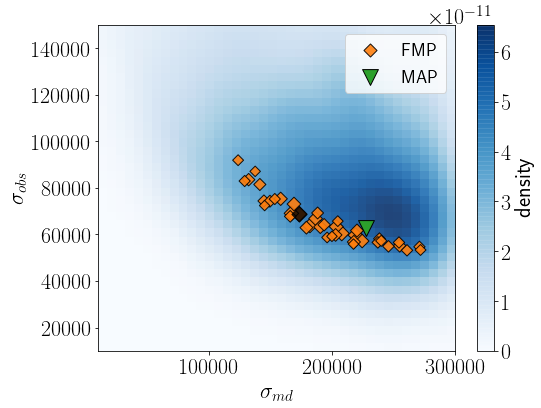

In [545]:
from scipy.stats import gaussian_kde

# fit an array of size [Ndim, Nsamples]
data = np.vstack([selected_samples['edm'],selected_samples['exp']])
kde = gaussian_kde(data,bw_method='scott')
kde.set_bandwidth(bw_method=0.263)

# evaluate on a regular grid
xgrid = np.linspace(10000,300000, 40)
ygrid = np.linspace(10000, 150000, 40)
Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)
Z = kde.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))
plt.figure(figsize=(8,6))
# Plot the result as an image
plt.imshow(Z.reshape(Xgrid.shape), origin='lower',aspect='auto',extent=[10000,300000,10000,150000],
           cmap='Blues',alpha=0.9)
cb = plt.colorbar()
cb.set_label("density")
plt.scatter(hpars_points['edm'],hpars_points['exp'],edgecolor='black',marker='D',alpha=0.9,color='tab:orange',s=0.0009*popt['p'].head(nhead),label='FMP')
plt.scatter(hpars_points['edm'].head(1),hpars_points['exp'].head(1),edgecolor='black',marker='D',alpha=0.8,color='black',s=0.0009*popt['p'].head(1))
plt.scatter(hparsestkoh[0],hparsestkoh[1],edgecolor='black',marker='v',color='tab:green',s=250,label=r'MAP')
plt.legend()
plt.xlabel(r'$\sigma_{md}$')
plt.ylabel(r'$\sigma_{obs}$')

print(kde.covariance)

In [546]:
#trouver le maximum du kde
import scipy.optimize as opt

def kde_eval(par):
    return -kde.evaluate(par)
#print(kde.evaluate([200000,60000]))
X0=[200000,60000]

res=opt.minimize(kde_eval,X0,method='Nelder-Mead',options={"maxiter":5000})
optresult=res.x
print(res)

 final_simplex: (array([[250028.22291022,  68068.08972978],
       [250028.22289277,  68068.08971905],
       [250028.22296673,  68068.08971681]]), array([-6.55508939e-11, -6.55508939e-11, -6.55508939e-11]))
           fun: -6.555089393295269e-11
       message: 'Optimization terminated successfully.'
          nfev: 137
           nit: 64
        status: 0
       success: True
             x: array([250028.22291022,  68068.08972978])


In [547]:
print(kde.evaluate([162990,66198])) #opti(voir cellule du dessous)

[4.2995564e-11]


In [548]:
print([hpars_points['edm'].head(1),hpars_points['exp'].head(1)])

[2988    173393.1
Name: edm, dtype: float64, 2988    68744.6
Name: exp, dtype: float64]


In [549]:
print(kde.evaluate([227831,62736])) #koh

[5.81987469e-11]


In [550]:
print(6.55/5.8)

1.1293103448275863
